In [1]:
# Import the tools
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Exploratory Data Analysis

In [3]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [5]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
#checking the data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# Checking for missing values
data.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

## Visualizing the Data

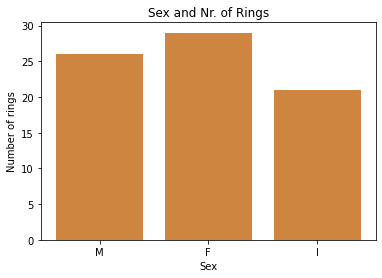

In [9]:
# Creating the fig, ax
fig, ax = plt.subplots()
# Create bar plot of first 1000 data entries 
ax.bar(data["Sex"][:1000], data["Rings"][:1000], color="peru")

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

### Diameter and Rings scatter plot

Scatter plots are used to determine whether two variables have a relationship or not. Here I want to see if the diameter and the number or the rings mean something together.



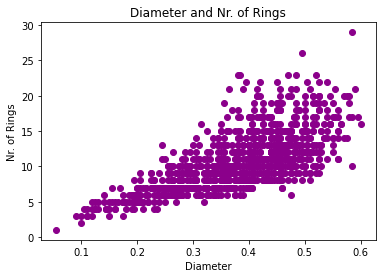

In [10]:
# Create a fig, ax
fig, ax = plt.subplots()

# Create a scatter plot with first 1000 data points
ax.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")

# Create a legend
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings");

### Whole weight and nr. of rings scatter plot

In this scatter plot, I am trying to find a relationship between the whole weight of an abalone mollusk, and its number of rings.



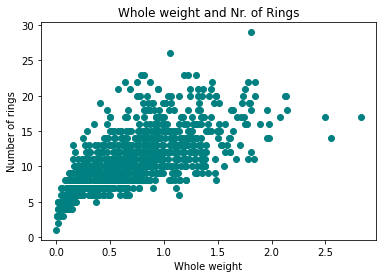

In [11]:
# Create fig, ax
fig, ax = plt.subplots()

# Create scatter plot of first 1000 data points
ax.scatter(data["Whole weight"][:1000], data["Rings"][:1000], color="teal")

#Create a legend
ax.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");


We can also plot all of these subplots together in one figure, to have a better comparison.

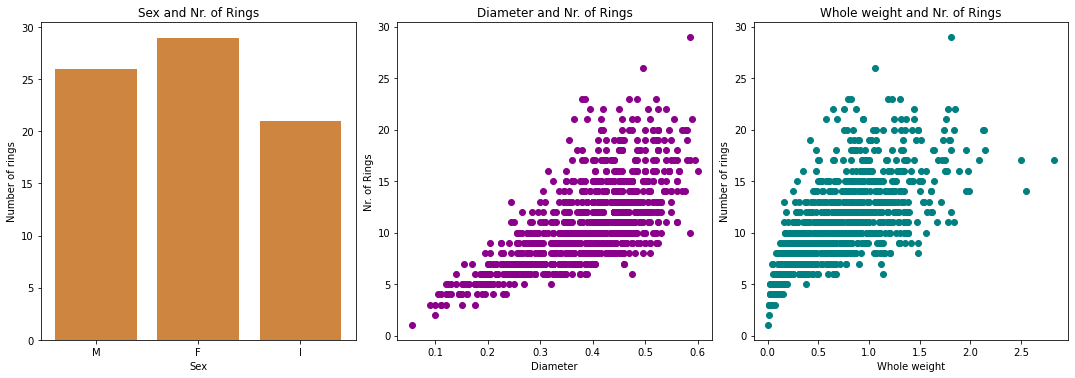

In [13]:
# Create a fig, ax
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) # first param "1" refers to nr. of rows, second param "3" referst to nr. of cols
fig.tight_layout()  #makes the columns more spaced out

#Sex and nr. of Rings
ax1.bar(data["Sex"][:1000], data["Rings"][:1000], color="peru")
ax1.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings")

# Diameter and nr. of Rings
ax2.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")
ax2.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings")

# Whole weight and nr. of Rings
ax3.scatter(data["Whole weight"][:1000], data["Rings"][:1000], color="teal")
ax3.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

Conclusion : We can see from the data visualization that in general, the larger the diameter and weight of an abalone shell, the more likely it is to have more rings. Female molluscs also have a slight tendency to live longer than male molluscs.



### Data modelling

In [14]:
# Checking for missing values
data.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Ok, we have no missing values. That‘s good! Now we can move on to step 2: Make sure all our data is numerical. At the most basic level, machines only understand numbers. So, to build a machine learning model, we need to convert all non-numeric categories into numbers. In this case, sex is our only non-numeric category. The sex column data type is Object.



In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Another way to check which columns are not numbers is through using a pandas function in a for loop:

In [16]:
# Check which columns have string values
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Sex


The sex column has 3 categories: female (F), male (M) and infant (I). First, we need to use Pandas astype() method to convert object datatyope to a category. Then, we will replace the categorical values with a numeric value using cat.codes so that the machine learning algorithm understands us.



If there are 3 different categories: male, female and child, the numbers 0, 1 and 2 will be assigned, in alphabetical order.



In [17]:
data["Sex"].value_counts()


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [18]:
data["Sex"] = data["Sex"].astype("category").cat.as_ordered()


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


### Label encoding

Another way to turn categorical data to numerical is by using label encoding from scikit-learn library.



In [21]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
l_encoder = LabelEncoder()

# transform data
data["Sex"] =  l_encoder.fit_transform(data["Sex"])


In [26]:
# view label encoded data
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


### More data modeling

Our initial task was to determine the age of the abalone molluscs based on the number of rings. We know that age is determined by the number of rings + 1.5. Therefore, we need to create a new ["Age"] column in our data and drop the ["Rings"] column.



In [29]:
# Add age column
data["Age"] = data["Rings"] + 1.5

# Drop rings column
data.drop("Rings", axis=1, inplace=True)


In [30]:
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Build a machine learning model

In [31]:
# Split data into X and y
X = data.drop("Age", axis=1) #axis=1 means that we drop the entire column
y = data["Age"]

In [32]:
X[:20]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320


In [33]:
y[:20]


0     16.5
1      8.5
2     10.5
3     11.5
4      8.5
5      9.5
6     21.5
7     17.5
8     10.5
9     20.5
10    15.5
11    11.5
12    12.5
13    11.5
14    11.5
15    13.5
16     8.5
17    11.5
18     8.5
19    10.5
Name: Age, dtype: float64

Divide data into train and test sets

We can now break down the data into train and test sets. Train set make up about 80% of our total data, and that's where we form our machine learning model. The test set represents about 20% of the data. The machine learning model doesn't see this data, so we can use it to test if the model can make good predictions.



In [34]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #test_size=0.2 means that we use 20% of data for test set
                                                    random_state=14) #we choose a random number for random_state to make our results reproducable


In [35]:
# See the length of the sets
len(X_train), len(y_train), len(X_test), len(y_test)


(3341, 3341, 836, 836)

### Choose a machine learning model

In [36]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)

# fit the model
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=14)

Evaluation metrics

Now that we've trained our model, we need to assess how well it works. There are several evaluation criteria for classification and regression models. The most common methods for evaluating a regression model are:

Mean Absolute Error (MAE)
Measures the average magnitude of the errors in predictions, without considering their direction. In other words, MAE → actual answer - predicted answer. The lower the value, the better.

Mean Square Error (MSE)
Shows how close a regression line is to a set of points. The lower the MSE, the better.

Root Mean Square Error (RMSE)
RMSE is used to return the MSE error to the original unit by taking the square root of it.

R2 score
R2 score is the proportion of the variance in the dependent variable that is predicted from the independent variables. Generally, a score higher than 0.7 is considered to have a good level of correlation, 0.5 to 0.7 is a moderate correlation, and a score below 0.4 shows a low level of correlation.

In [37]:
# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores


In [38]:
# fit the model again
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=14)

In [39]:
show_score(rf)


{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

We can see that the error in test sets is higher than in training sets. This is a good thing because when the machine model makes predictions based on the training set, it has already learned the correct answer. At the same time, the error in the test sets is higher because the model does not know the answers to the test data. We can visualize the actual responses along with the predicted ones to see the error more clearly.



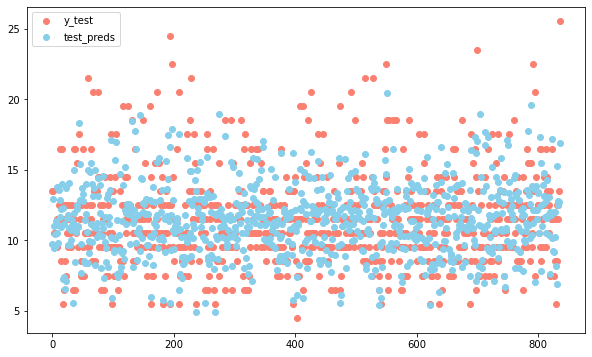

In [40]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();

In [41]:
#Check current parameters
from pprint import pprint

print("Current parameters:")
pprint(rf.get_params())


Current parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


In [43]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=14),
                              param_distributions=rf_grid, 
                              n_iter=100, # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5, # number of cross-validation folds for each set of parameters
                              verbose=True) # requesting more elaborate output in the log

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [44]:
# Score of the RandomizedSearchCV model
show_score(rs_model)


{'Training MAE': 0.9678341828912006,
 'Test MAE': 1.455939669877586,
 'Training MSE': 0.009517049290609661,
 'Test MSE': 0.02224793343184812,
 'Training RMSE': 0.09755536525793781,
 'Test RMSE': 0.14915741158872434,
 'Training R2': 0.8141644011923308,
 'Test R2': 0.561613909985192}

In [45]:
# Score of original RandomForest model
show_score(rf)


{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

In [46]:
# Check most ideal params
rs_model.best_params_


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': None}

### Building ideal model

In [47]:
# Ideal model 

ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features=0.5,
                                    min_samples_leaf=5,
                                    min_samples_split=5,
                                    n_estimators=200)
# Fit the ideal model
ideal_model.fit(X_train, y_train)


RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200)

In [48]:
# Score of the deal model 
show_score(ideal_model)


{'Training MAE': 1.0862528798827862,
 'Test MAE': 1.4453464318741243,
 'Training MSE': 0.01202212067872477,
 'Test MSE': 0.02191048815287245,
 'Training RMSE': 0.1096454316363649,
 'Test RMSE': 0.148021917812439,
 'Training R2': 0.7652797872538892,
 'Test R2': 0.5669897469204158}

In [49]:
# The original RandomForest model
show_score(rf)


{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

In [50]:
# Make predictions on test data
test_preds = ideal_model.predict(X_test)
test_preds [:20], y_test[:20]


(array([10.01145944, 12.83023304, 10.48606719,  9.39154726, 10.58285515,
         9.55456565, 11.47975246, 10.82771847, 12.19295761, 11.38590018,
         9.81198566, 13.52098374, 12.15008674, 11.59441518, 12.22524401,
        11.14367438, 13.97816158,  7.31810599, 11.85824282,  7.47850943]),
 2374    13.5
 3341    13.5
 3361    10.5
 2574     9.5
 1624    10.5
 2874     9.5
 3908    10.5
 1302     9.5
 3771    11.5
 1024    11.5
 629     11.5
 890     12.5
 585     12.5
 2328    16.5
 2920    11.5
 1766     8.5
 778     16.5
 4119     5.5
 648     12.5
 538      6.5
 Name: Age, dtype: float64)

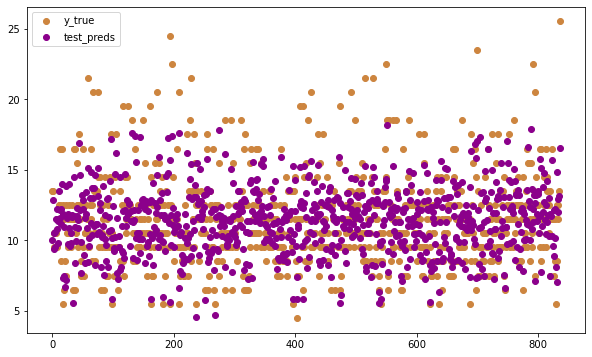

In [51]:
# Visualize predicted and true values

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="peru", label="y_true")
plt.scatter(range(y_test.shape[0]), test_preds, color="darkmagenta", label="test_preds")
plt.legend();


## Results

We observed, there are some overlaping between ture and predicted values, which means that the model we used is quite good for age prediction of abalone mollusks.



##### checking out the feature importance.



In [52]:
# Creating a function that finds feature importances
def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
    .sort_values("feature_importances", ascending=False) # sort importances from the biggest to the smallest
    .reset_index(drop=True)) # deletes the index number

  #Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:20], color="skyblue")
  ax.set_ylabel("Features")
  ax.set_label("Feature importance")
  ax.invert_yaxis()


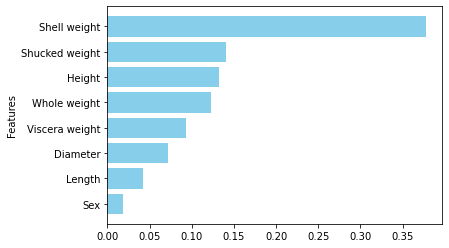

In [53]:
plot_features(X_train.columns, ideal_model.feature_importances_)


We observed, shell weight was the key characteristic for prediction of the age of abalone molluscs. As well as, shelled weight and total weight were relatively important. Secondly, the sex of the molluscs does not significantly affect the predictions.
